In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [126]:
calories=pd.read_csv('calories.csv')

In [127]:
calories.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [128]:
exercise_data=pd.read_csv("exercise.csv")

In [129]:
exercise_data.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [130]:
exercise_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [131]:
calories_data=pd.concat([exercise_data,calories['Calories']], axis=1)

In [132]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [133]:
sns.set()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

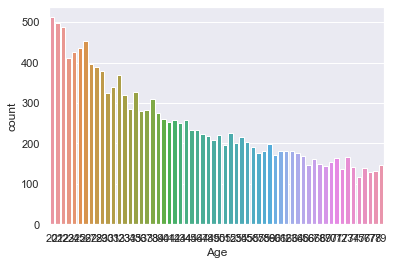

In [134]:
sns.countplot(calories_data["Age"])

In [135]:
calories_data.replace({'Gender':{"male":0 ,'female':1}},inplace=True)

In [136]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [137]:
alg=[]
acc=[]

In [138]:
X=calories_data.drop(columns={"User_ID","Calories"})

In [139]:
Y=calories['Calories']

In [140]:
X_train, X_test ,Y_train, Y_test= train_test_split(X,Y,test_size=0.7)

In [141]:
model=XGBRegressor()


In [142]:
alg.append("xgb regressor")
model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [143]:
test_data_prediction= model.predict(X_test)

In [144]:
print(test_data_prediction)

[ 86.17336   54.339764 136.45615  ...  67.892136 160.29086  104.261765]


In [145]:
print(Y_test)

10265     83.0
3226      53.0
9955     135.0
11287    255.0
2839      61.0
         ...  
6530     173.0
14295    141.0
10156     70.0
3906     156.0
1238     102.0
Name: Calories, Length: 10500, dtype: float64


In [146]:
score=model.score(X_test,Y_test)

In [147]:
acc.append(score)

In [148]:
X_train


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
9710,0,32,171.0,71.0,9.0,83.0,39.6
4134,0,36,180.0,78.0,6.0,85.0,39.2
6065,0,60,171.0,76.0,10.0,84.0,39.6
13948,0,53,175.0,81.0,5.0,89.0,39.2
4702,0,55,200.0,99.0,26.0,95.0,41.0
...,...,...,...,...,...,...,...
9413,1,33,181.0,75.0,5.0,81.0,39.4
6378,1,20,160.0,63.0,18.0,106.0,40.4
5486,1,36,177.0,69.0,13.0,99.0,40.4
2509,1,52,154.0,55.0,1.0,67.0,38.0


In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
linearmodel=LinearRegression()
alg.append("linear regression")

In [151]:
linearmodel.fit(X_train,Y_train)

LinearRegression()

In [152]:
prediction=linearmodel.predict(X_test)

In [153]:
print(prediction)

[ 81.28539429  52.96861425 142.73021777 ...  71.89606233 157.36123151
  99.69836205]


In [154]:
score=linearmodel.score(X_test,Y_test)
print(score)

0.9671547634691811


In [155]:
acc.append(score)

In [156]:
print(alg)

['xgb regressor', 'linear regression']


<AxesSubplot:title={'center':'Accuracy Comparision'}, xlabel='Accuracy', ylabel='Algorithms'>

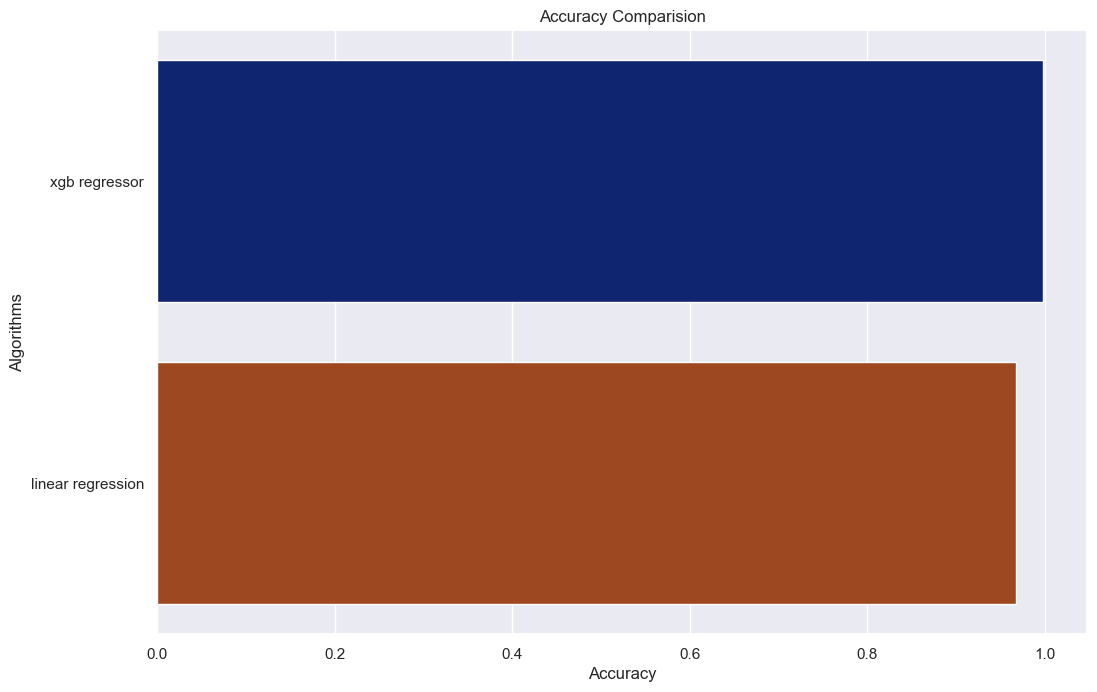

In [157]:
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = alg,palette = 'dark')

In [158]:
print(acc)

[0.9977982388120342, 0.9671547634691811]
